In [141]:
# Brenda Woodard
# DST II Assignment 3

# Goal: Give you the opportunity to get acquainted with the modeling in scikit-learn using decision trees. 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn import metrics
# from sklearn.metrics import plot_roc_curve
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, r2_score, plot_roc_curve, plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import(train_test_split, GridSearchCV, cross_val_score, cross_val_predict, validation_curve) 

In [124]:
# Question 1

# For the current presidential election, campaign organizers for both the Republican & Democrat parties are interested in
# identifying undecided voters who would consider voting for their party. The file BlueOrRed.csv contains data on a sample
# of voters with tracked variables including: 
#     whether or not they are undecided regarding their candidate preference
#     age 
#     whether they own a home
#     gender
#     marital status
#     household size
#     income 
#     years of education
#     whether they attend church 

# For this dataset, you would use the Undecided variable as your output variable & the rest of the variables as your input
# variables. You want to predict whether a candidate is undecided(1) or decided(0).  

# Read in the data 
dataSet = pd.read_csv('BlueOrRed.csv')
BvR = pd.DataFrame(dataSet)

# Check for missing data
print(BvR.isnull().sum())

# Show the first 5 rows of DataFrame
print(BvR.head(5))

# Normalize the continuous variables using min-max normalization
data = BvR.values[:, :-1]
# Robust scaler transform of the dataset
transform = MinMaxScaler()
data = transform.fit_transform(data)
# Convert array back to a dataframe
BvRDat = pd.DataFrame(data)

# Show the normalization & the first 5 rows of your new dataset. 
print(BvRDat.describe())
print(BvRDat.head(5))

Age              0
HomeOwner        0
Female           0
Married          0
HouseholdSize    0
Income           0
Education        0
Church           0
Undecided        0
dtype: int64
   Age  HomeOwner  Female  Married  HouseholdSize  Income  Education  Church  \
0   51          1       1        1              4   171.0         15       0   
1   46          1       1        1              6   420.0         15       1   
2   55          1       0        1              6   132.0         16       0   
3   50          1       0        1              4    18.0          8       0   
4   49          1       1        1              2    66.0         15       1   

   Undecided  
0          1  
1          0  
2          1  
3          0  
4          1  
                  0            1             2            3             4  \
count  10000.000000  10000.00000  10000.000000  10000.00000  10000.000000   
mean       0.466513      0.84170      0.787500      0.74790      0.390033   
std        0.1

Q: Why do you think using min-max normalization is a better choice for this situation compared to using other scalers
such as the Standard Scaler which standardizes the data?

A:Our data has varying scales and we are not making assumptions about the distribution of fhe data so we will use Normalization. Since we don't know if the data is uniformly distributed we wouldn't want to use Standarization.

In [128]:
# Split the data into training & test sets. Test set should be 30% of the entire data. 
data = BvRDat.values
# split data into inputs & outputs
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Print the shape of the split data sets 
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Construct a decision tree & fit the tree into the data. 
clf = tree.DecisionTreeClassifier()
clf2 = clf.fit(X_train,y_train)

# Use your decision tree model to make predictions on the training set as well as on the test set. 
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)

# Print out the first 100 predictions for each of the y_train_pred & y_test_pred. 
print(y_train_pred[0:100])
print(y_test_pred[0:100])
# Find the overall accuracy of the tree model on the training set & on the test set. 
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

(10000, 7) (10000,)
(7000, 7)
(7000,)
(3000, 7)
(3000,)
[0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0.]
[0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0.]
Accuracy: 0.5133333333333333
Accuracy: 0.9965714285714286


Q: Does the tree overfit the model? Why or why not? Provide a brief explanation. 

A: The model is overfitting because it is performing much better on the training set than the test set. 

In [129]:
# Use the .score() method of the tree estimator to find the overall accuracy on the training set & test set. 
s1 = clf2.score(X_train, y_train)
s2 = clf2.score(X_test, y_test)
print("Accuracy of Training Data:", s1)
print("Accuracy of Testing Data:", s2)

# Use the zero_one_loss() to compute the overall prediction error of the tree model on the test set & training set. 
z = metrics.zero_one_loss(y_train, y_train_pred)
print("Prediction Error:", z)

Accuracy of Training Data: 0.9965714285714286
Accuracy of Testing Data: 0.5133333333333333
Prediction Error: 0.0034285714285714475


In [130]:
# Question 2
# Do other assessment of your model using the following tools in sklearn.metrics module

# Generate the classification report using the classification_report() 
CR = metrics.classification_report(y_train, y_train_pred)
print("Classification Report:", CR)

# Generate the confusion matrix using confusion_matrix() 
CM = metrics.confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:", CM)

# Generate the precision score using precision_score() 
PS = metrics.precision_score(y_train, y_train_pred)
print("Precision Score:", PS)

# Generate the recall score using recall_score()
RS = metrics.recall_score(y_train, y_train_pred)
print("Recall Score:", RS)

# Generate the f1 score using f1_score()
F1 = metrics.f1_score(y_train, y_train_pred)
print("F1 Score:", F1)

Classification Report:               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3492
         1.0       1.00      0.99      1.00      3508

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

Confusion Matrix: [[3491    1]
 [  23 3485]]
Precision Score: 0.9997131382673551
Recall Score: 0.9934435575826682
F1 Score: 0.996568487274807


Q: When is it more appropriate to use f1 score (or precision score & recall) compared to using the overall accuracy to evaluate your model?

A: If you are most interested in how many are actual positive out of those predicted positive, f1 score may be a better measure especially if you are seeking a balance between Precision and Recall and you have a large number of actual negatives.

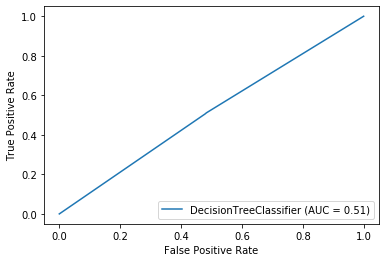

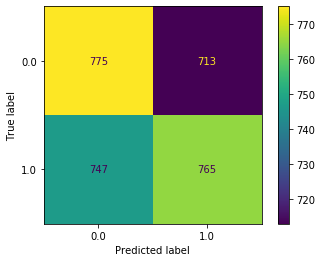

In [131]:
# Generate a roc curve using plot_roc_curve() 
plot_roc_curve(clf2, X_test, y_test)

# Plot the confusion matrix using plot_confusion_matrix
plot_confusion_matrix(clf2, X_test, y_test)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
0.5048571428571429
[1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0.]
17


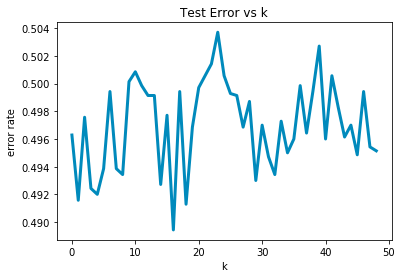

In [140]:
# Question 3

# You will now use cross validation to find better accuracy scores as well as to tune your hyperparameters. We are more 
# interested in optimizing the depth of the tree (max_depth). First retrieve the maximum depth of this decision tree. 
print(clf2.get_params())

# Find the optimal depth of the tree by tuning the max_depth hyperparameter. 
# Write a for loop to iteratively compute the overall error rate of the model on the test set for the possible values
# of the maximum depth of the tree only. 

# Initialize a variable outside the loop to track the error rates for each maximum depth value
test_errors = []
# Use clf.tree_.max_depth where clf is the name of your estimator & tree is the module in sklearn
for i in range(1, clf2.tree_.max_depth):
    tree_clf = tree.DecisionTreeClassifier(max_depth = i)
    clf3 = tree_clf.fit(X_train, y_train)
    scores = cross_val_score(estimator= clf3, X= X_train, y= y_train, scoring= "accuracy", cv= 8)
    test_errors.append(1-np.mean(scores))

print(np.mean(scores))
print(cross_val_predict(clf3, X_train, y_train, cv=8)[0:100])

k = range(1, 51)
# Use np.argmin() on the error rates to retrieve the optimal maximum depth of the tree with the least error rate.
k_best1 = k[np.argmin(test_errors)]
print(k_best1)

# Plot the overall error rate on the y-axis & the maximum depth of the tree on the x-axis. 
plt.title("Test Error vs k")
plt.xlabel("k")
plt.ylabel("error rate")
plt.plot(test_errors, color="#008ABC", lw=3)

Q: Does this value match with what you see on your plot? 

A: No

In [136]:
# Find the optimal maximum depth of the decision tree model using grid search cross validation. Simultaneously optimize 
# the max_features hyperparameter. You can check the documentation to see what these hyperparameters represent. 
param_grid = {'max_depth':range(1, clf3.max_depth), 'max_features': [0.2, 0.4, 0.6, 0.8]}

# Use the GridSearchCV() constructor; make sure to pass estimator & param_grid into the GridSearchCV() constructor. 
grid = GridSearchCV(estimator = clf3, param_grid = param_grid, scoring = None, cv = 8) # Set the parameter cv = 8
grid.fit(X_train, y_train)
print(grid.best_params_)
print("Accuracy on training set: ", grid.score(X_train, y_train))
print("Accuracy on test set: ", grid.score(X_test, y_test))

grid.predict(X_test)

{'max_depth': 27, 'max_features': 0.4}
Accuracy on training set:  0.9165714285714286
Accuracy on test set:  0.5106666666666667


array([1., 1., 0., ..., 0., 0., 0.])

Q: Do you have the same optimal maximum depth as you got in the question above? 

A: No

30


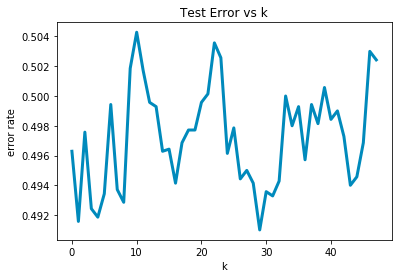

In [139]:
# Tune the maximum depth hyperparameter again using cross validation but this time, use the cross_val_score() 
# Use this cross_val_score() function in combination with a for loop to find the optimal maximum depth of the tree. 
test_error2 = []
for i in range(1, clf3.max_depth):
    clf4 = tree.DecisionTreeClassifier(max_depth = i)
    clf5 = clf4.fit(X_train, y_train)
    scores2 = cross_val_score(estimator = clf5, X = X_train, y = y_train, scoring = 'accuracy', cv = 8)
    test_error2.append(1-np.mean(scores2))
    
# Track the error rate for each depth & plot the error rates versus the corresponding maximum depths of the tree.
plt.title("Test Error vs k")
plt.xlabel("k")
plt.ylabel("error rate")
plt.plot(test_error2, color="#008ABC", lw=3);


# Use the np.argmin() on the error rates to retrieve the optimal maximum depth, corresponding to the lowest error rate. 
k = range(1, 51)
k_best2 =k [np.argmin(test_error2)]
print(k_best2)

Q: Does the retrieved optimal maximum depth look like what you see on your plot? 

A: No

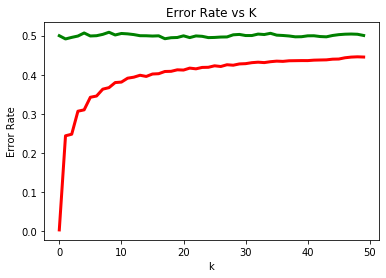

In [138]:
# Use another approach to plot the error rates versus the maximum depth of the tree.
knn = KNeighborsClassifier()

# The validation_curve() function implements cross validation & returns the training accuracy scores & test (validation) 
# accuracy scores for each iteration in the k-fold cross validation, for each of the hyperparameter values. 
train_acc, test_acc = validation_curve(knn, X_train, y_train, param_name= "n_neighbors", param_range= range(1, 51), cv= 8)

# You will need to aggregate the scores using np.mean(axis=1) to get the average of the accuracy scores for all iterations, 
# for each hyperparameter value. Use these average accuracy scores to obtain corresponding error rates for the training & 
# test (validation) sets. 
train_acc_average = np.mean(train_acc, axis = 1)
test_acc_average = np.mean(test_acc, axis = 1)

# Plot the error rates on the training set versus the maximum depth values. Plot on the same figure, the error rates of 
# the test (or validation) set versus the maximum depth values. 
plt.title("Error Rate vs Max Depth Values")
plt.xlabel("Max Depth Values")
plt.ylabel("Error Rate")
plt.plot(1-train_acc_average, color = "red", lw = 3)
plt.plot(1-test_acc_average, color = "green", lw = 3)
plt.show()

Q: What is the optimal maximum depth?

A: 27